### Importación de datos



In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [122]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


Leendo los tipos de informacion con el que trabajaremos


In [123]:
tienda1.info()
tienda2.info()
tienda3.info()
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

No obtenemos ningun dato de tipo null o faltante, procedemos ha hacer de forma grafic algunas comparaciones entre cada tienda con respectos a todos sus elementos

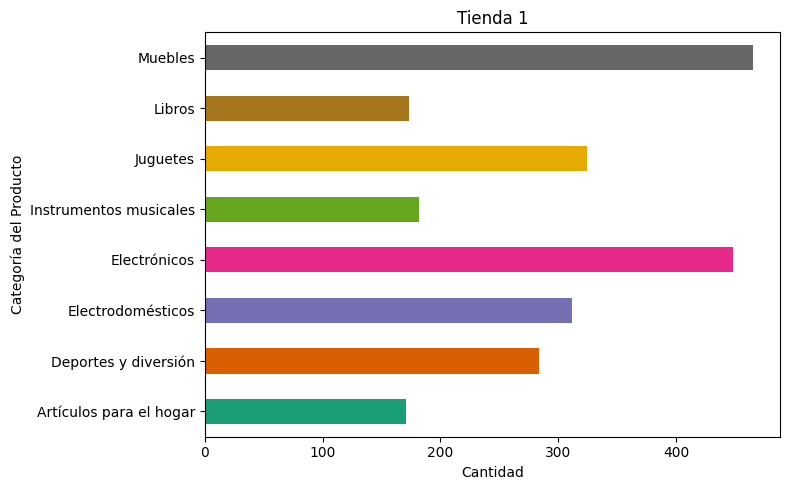

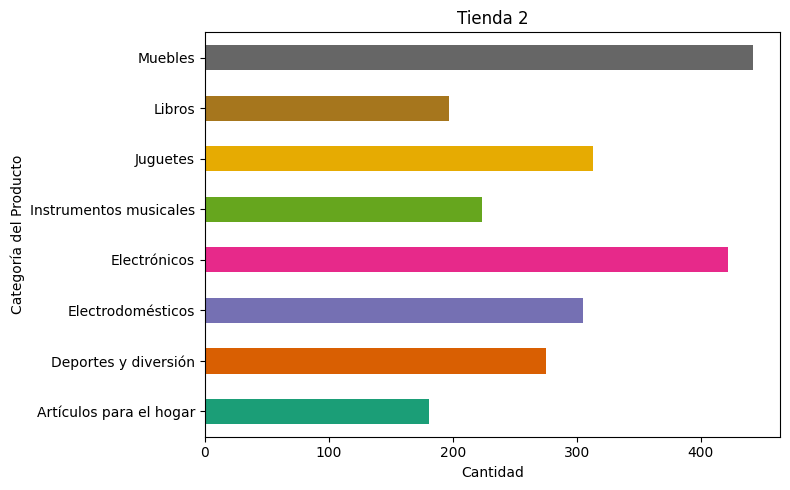

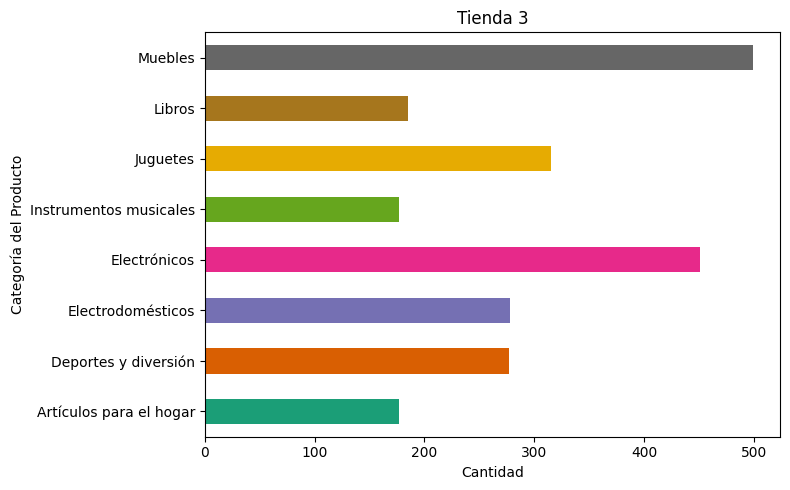

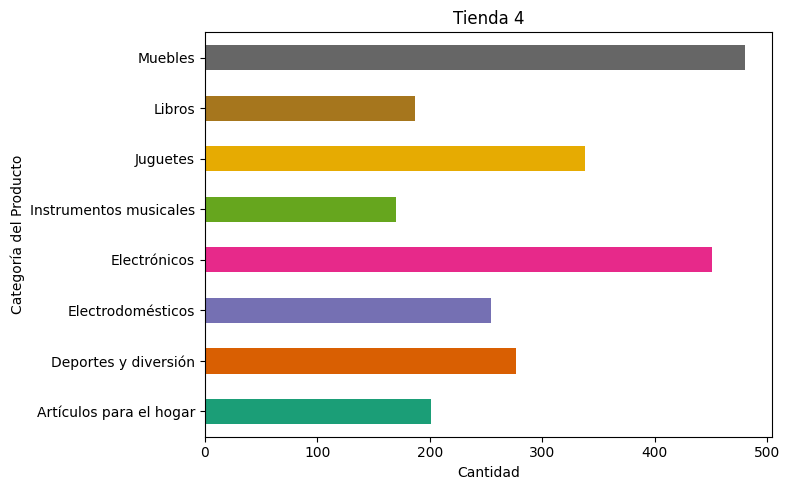

In [124]:
def graf_tiendas(tienda, titulo =''):
    plt.figure(figsize=(8, 5))
    tienda.groupby('Categoría del Producto').size().plot(
        kind='barh',
        color=sns.color_palette('Dark2')
    )
    plt.title(f'Tienda {titulo}')
    plt.xlabel('Cantidad')
    plt.ylabel('Categoría del Producto')
    plt.tight_layout()
    plt.show()


graf_tiendas(tienda1, '1')
print()
graf_tiendas(tienda2, '2')
print()
graf_tiendas(tienda3, '3')
print()
graf_tiendas(tienda4, '4')

## Extraccion de datos

Podemos utilizar las ganancias de cada tienda y compararlas deacuerdo a la recaudacion total

In [125]:
def ganancias(tienda): # hacemos una funcion para calcular la suma de las ganancias de una tienda
  return tienda['Precio'].sum()

In [126]:
# alamacenando las ganancias de cada tienda en variables
g1 = ganancias(tienda1)
g2 = ganancias(tienda2)
g3 = ganancias(tienda3)
g4 = ganancias(tienda4)


#1. Análisis de facturación



Almacenanado las ganancias en dataframes

In [127]:
pd.options.display.float_format = '{:,.0f}'.format #precicion de lectura de cifras

# conviritiendo a dataframe                      ,
ingresos_df=pd.DataFrame({"Tiendas":["Tienda 1","Tienda 2","Tienda 3","Tienda 4"],"Total":[g1,g2,g3,g4]})
display(ingresos_df)


,Tiendas,Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


Mostrando los datos en forma grafica de los ingresos totales de cada tienda a partir de los precios

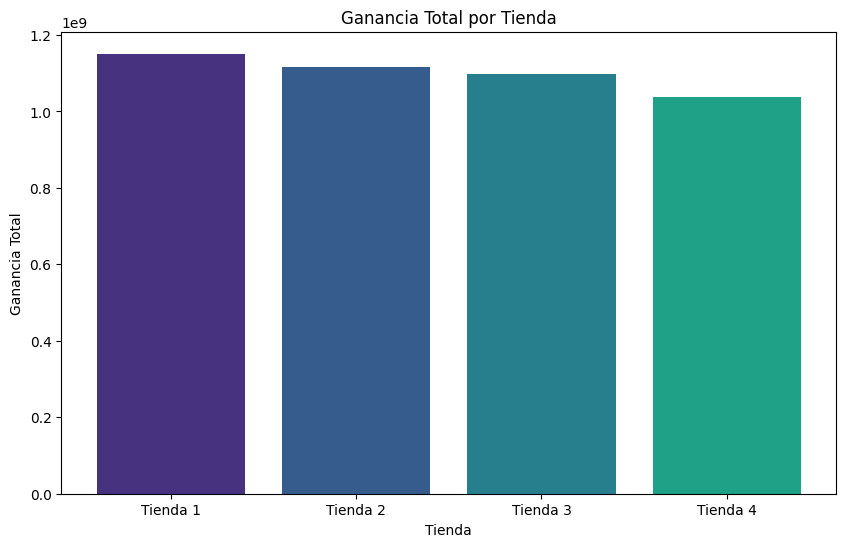

In [128]:

ganancias = {
    'Tienda 1': g1,
    'Tienda 2': g2,
    'Tienda 3': g3,
    'Tienda 4': g4
}

plt.figure(figsize=(10, 6))
plt.bar(ganancias.keys(), ganancias.values(), color=sns.color_palette('viridis'))
plt.title('Ganancia Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ganancia Total')
plt.show()

Podemos interpretar a simple vista que la tienda 4 tiene un margen menor de ingresos a comparación de las demas tiendas

# 2. Ventas por categoría

Para cad tienda calculamos los ingresos de cada tipo de materia en la tienda

In [129]:
lista_tiendas = [(1, tienda1), (2, tienda2), (3, tienda3), (4, tienda4)]

for i in lista_tiendas:
    print(f"\nTienda {i[0]} - No. de ventas por categoría:\n")
    venta_por_categoria = i[1].groupby('Categoría del Producto')['Producto'].count().reset_index(name="Numero de ventas")

    # Calcular el total de ventas
    total_de_ventas = venta_por_categoria['Numero de ventas'].sum()
    print(f"\nTotal de ventas: {total_de_ventas}")

    # Calcular el porcentaje en contraste con el total de ventas
    venta_por_categoria['porcentaje %'] = (venta_por_categoria['Numero de ventas'] / total_de_ventas) * 100

    print(venta_por_categoria)



Tienda 1 - No. de ventas por categoría:


Total de ventas: 2359
    Categoría del Producto  Numero de ventas  porcentaje %
0  Artículos para el hogar               171             7
1     Deportes y diversión               284            12
2        Electrodomésticos               312            13
3             Electrónicos               448            19
4   Instrumentos musicales               182             8
5                 Juguetes               324            14
6                   Libros               173             7
7                  Muebles               465            20

Tienda 2 - No. de ventas por categoría:


Total de ventas: 2359
    Categoría del Producto  Numero de ventas  porcentaje %
0  Artículos para el hogar               181             8
1     Deportes y diversión               275            12
2        Electrodomésticos               305            13
3             Electrónicos               422            18
4   Instrumentos musicales               224

/tmp/ipython-input-130-1020059618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentaje %', y='Categoría del Producto', data=venta_por_categoria, palette='viridis')


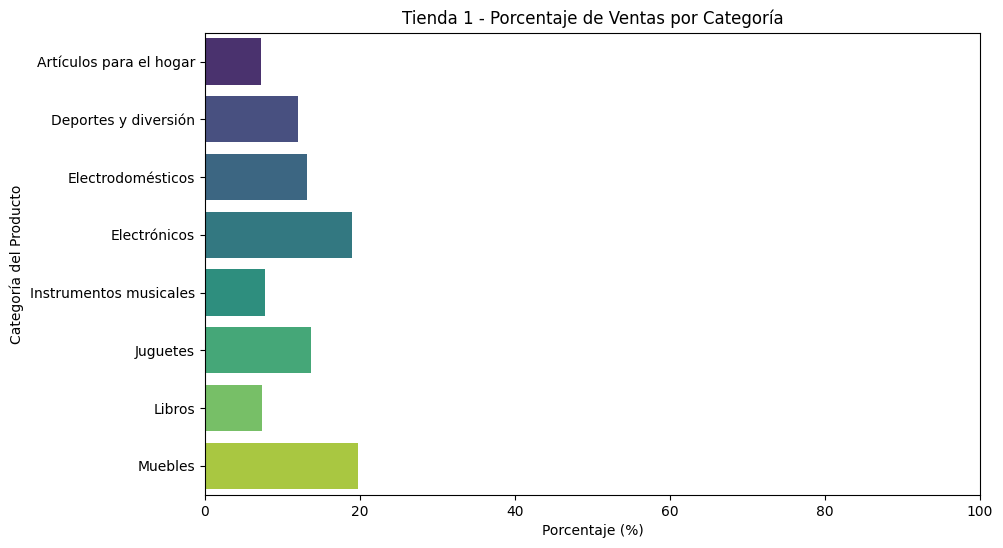

/tmp/ipython-input-130-1020059618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentaje %', y='Categoría del Producto', data=venta_por_categoria, palette='viridis')


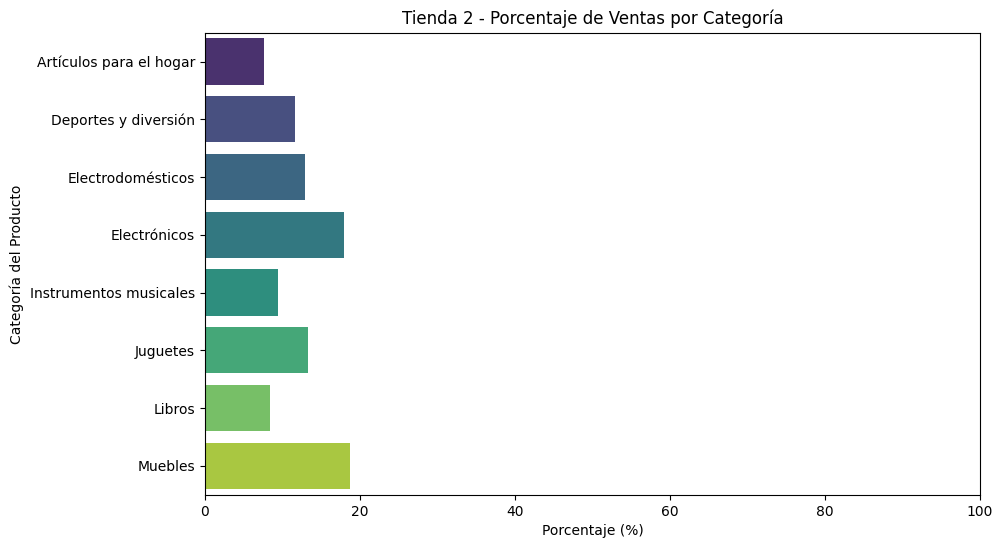

/tmp/ipython-input-130-1020059618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentaje %', y='Categoría del Producto', data=venta_por_categoria, palette='viridis')


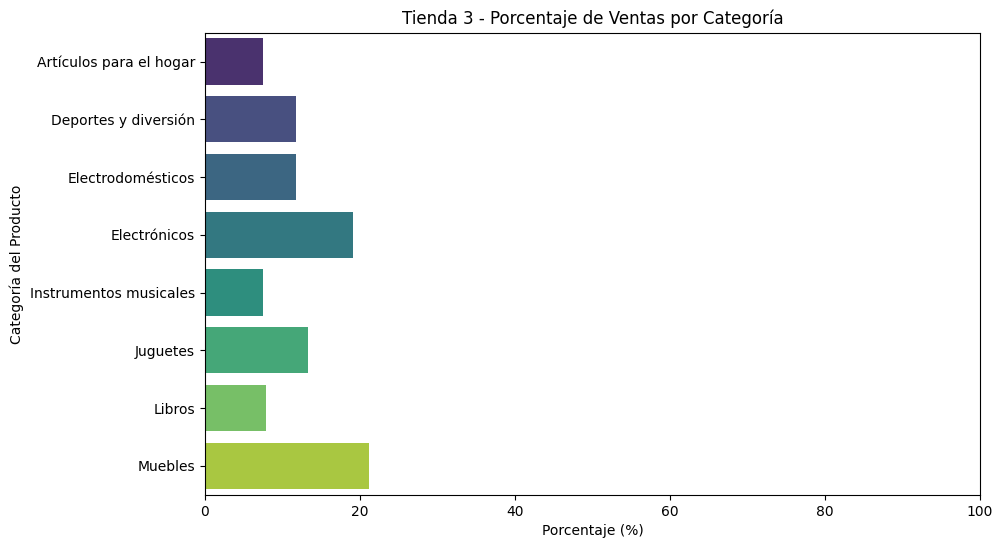

/tmp/ipython-input-130-1020059618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='porcentaje %', y='Categoría del Producto', data=venta_por_categoria, palette='viridis')


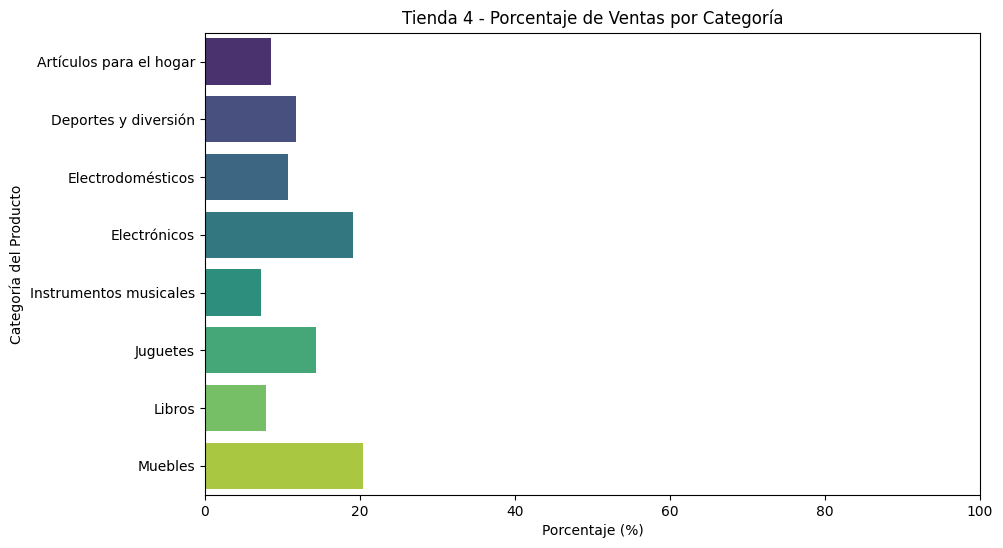

In [130]:

def plot_sales_percentage_by_category(tienda, tienda_num):
    venta_por_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Numero de ventas")
    total_de_ventas = venta_por_categoria['Numero de ventas'].sum()
    venta_por_categoria['porcentaje %'] = (venta_por_categoria['Numero de ventas'] / total_de_ventas) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x='porcentaje %', y='Categoría del Producto', data=venta_por_categoria, palette='viridis')
    plt.title(f'Tienda {tienda_num} - Porcentaje de Ventas por Categoría')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Categoría del Producto')
    plt.xlim(0, 100)  # Set x-axis limit to 100%
    plt.show()

for i in lista_tiendas:
    plot_sales_percentage_by_category(i[1], i[0])

# 3. Calificación promedio de la tienda


In [131]:
# Función para calcular la calificación promedio
def calcular_calificacion_promedio(urls):
    promedios = {}

    for i, url in enumerate(urls, start=1):
        try:
            tienda = pd.read_csv(url)
            promedio = tienda['Calificación'].mean()  # Asumiendo que la columna se llama 'calificacion'
            promedios[f'tienda_{i}'] = promedio
        except Exception as e:
            promedios[f'tienda_{i}'] = str(e)  # Guardar el error si ocurre
    return promedios
# Lista de URLs
urls = [url, url2, url3, url4]
# Calcular y mostrar los promedios
resultados = calcular_calificacion_promedio(urls)
print(resultados)

{'tienda_1': np.float64(3.976685036032217), 'tienda_2': np.float64(4.037303942348453), 'tienda_3': np.float64(4.048325561678677), 'tienda_4': np.float64(3.9957591178965224)}


In [149]:
# Crear DataFrame y asegurar que la columna de calificaciones promedio sea de tipo flotante
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Tienda', 'Calificacion Promedio'])
df_resultados['Calificacion Promedio'] = df_resultados['Calificacion Promedio'].astype(float)
# Mostrar el DataFrame
display(df_resultados)

,Tienda,Calificacion Promedio
0,tienda_1,4
1,tienda_2,4
2,tienda_3,4
3,tienda_4,4


In [153]:
import altair as alt

# Create a scatter plot using Altair
chart = alt.Chart(df_resultados).mark_circle().encode(
    # Set 'Tienda' on the x-axis
    x='Tienda',
    # Set 'Calificacion Promedio' on the y-axis
    y='Calificacion Promedio'
).properties(
    # Set the width and height of the chart
    width=600,
    height=300
)

# Display the chart
chart

alt.Chart(...)

# 4. Productos más y menos vendidos

Oteniendo la cantidad de productos mas y menos vendidos a partir de la cantidad de unidades consultadas


Estos son los 5 productos más vendidos de la Tienda 1:


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56



Estos son los 5 productos menos vendidos de la Tienda 1:


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


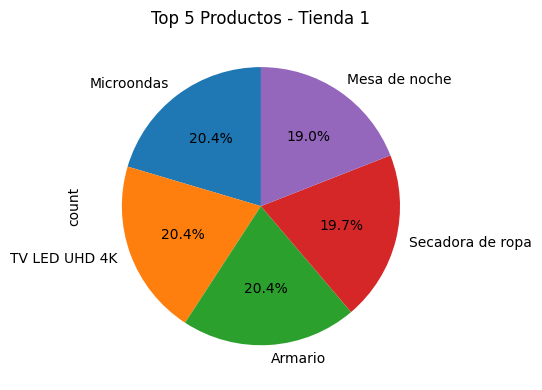


Estos son los 5 productos más vendidos de la Tienda 2:


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58



Estos son los 5 productos menos vendidos de la Tienda 2:


,count
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


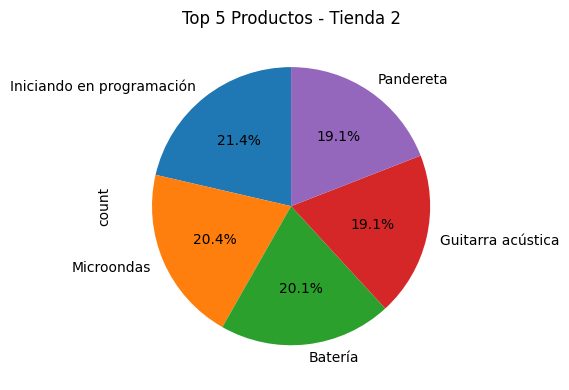


Estos son los 5 productos más vendidos de la Tienda 3:


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55



Estos son los 5 productos menos vendidos de la Tienda 3:


,count
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


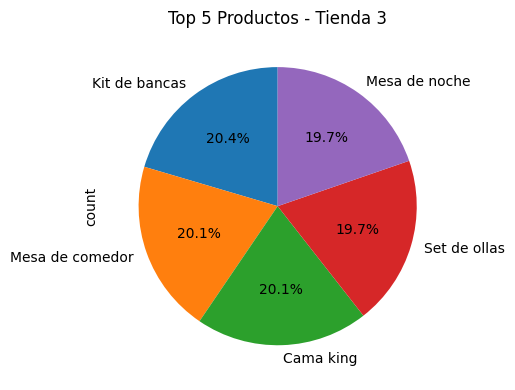


Estos son los 5 productos más vendidos de la Tienda 4:


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55



Estos son los 5 productos menos vendidos de la Tienda 4:


,count
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


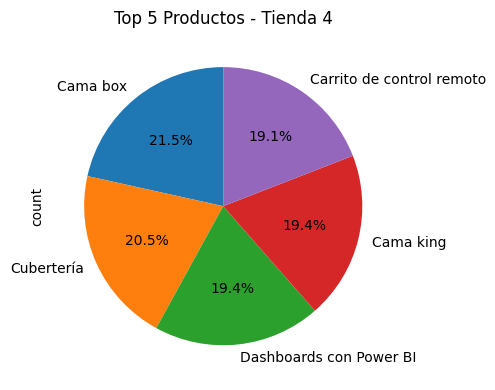

In [133]:
tiendas={"Tienda 1":tienda1,"Tienda 2":tienda2,"Tienda 3":tienda3,"Tienda 4":tienda4}
mas_vendidos={}
menos_vendidos={}


for i, (nombre, df) in enumerate(tiendas.items()):

    vendidos = df['Producto']
    mas_vendidos[nombre] = vendidos.value_counts().head(5) # mediante cantidad de productos vendidos
    menos_vendidos[nombre] = vendidos.value_counts().tail(5) # los menos usuales sera los 5 ultimos

    print(f"\nEstos son los 5 productos más vendidos de la {nombre}:")
    display(mas_vendidos[nombre])
    print(f"\nEstos son los 5 productos menos vendidos de la {nombre}:")
    display(menos_vendidos[nombre])

    plt.figure(figsize=(6,4))

    mas_vendidos[nombre].plot(kind='pie', autopct='%1.1f%%', startangle=90)

    plt.title(f'Top 5 Productos - {nombre}')



    plt.tight_layout()

    plt.show()

# 5. Envío promedio por tienda

calculo de costo promedio de envio en cada tienda

In [134]:

def calcular_costo_envio(lista_tiendas):
  costos_lista=[]
  for i in (lista_tiendas):
    costo_envio=i[1]["Costo de envío"].mean().round(2)
    tienda=f"Tienda {i[0]}"
    costos_lista.append({'Tienda':tienda,'Costo promedio':costo_envio})
    costos_df=pd.DataFrame(costos_lista)
  display(costos_df)
  return costos_lista

costos_lista = calcular_costo_envio(lista_tiendas)

,Tienda,Costo promedio
0,Tienda 1,"26,019"
1,Tienda 2,"25,216"
2,Tienda 3,"24,806"
3,Tienda 4,"23,459"


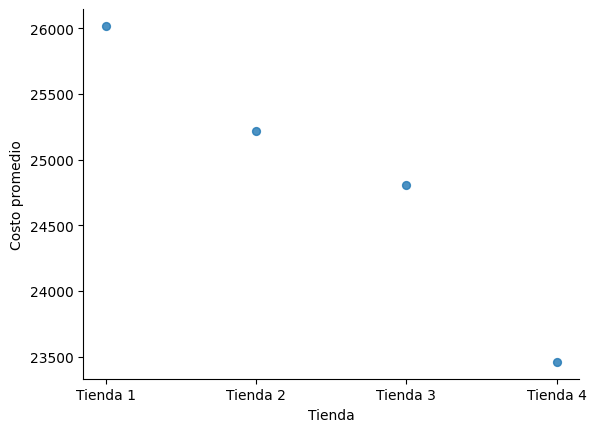

In [154]:

# Crear el gráfico de dispersión
_df_3.plot(kind='scatter', x='Tienda', y='Costo promedio', s=32, alpha=.8)

# Configurar los ejes
plt.gca().spines[['top', 'right']].set_visible(False)
# Mostrar el gráfico
plt.show()


Se puede interpretar que la tienda 4 tiene menos gastos de envio en comparaxción a los otras tiendas

#Tiempo de operacion
calculamos el tiempo de operacion de cada tienda, pues como se ha visto la tienda 4 en comparación a la tienda 1 tiene un margen favorable  en cuanto a Calificacion de Producto.

In [162]:
from datetime import datetime

In [172]:
def calculate_operating_time(tienda_df):
  """Calculates the operating time of a store in days."""
  tienda_df['Fecha'] = pd.to_datetime(tienda_df['Fecha de Compra'], format='%d/%m/%Y')
  min_date = tienda_df['Fecha'].min()
  max_date = tienda_df['Fecha'].max()
  # Calculate difference in days
  operating_days = (max_date - min_date).days
  return operating_days

operating_time_tienda1 = calculate_operating_time(tienda1)
operating_time_tienda2 = calculate_operating_time(tienda2)
operating_time_tienda3 = calculate_operating_time(tienda3)
operating_time_tienda4 = calculate_operating_time(tienda4)

print(f"Tiempo de operación de Tienda 1: {operating_time_tienda1} dias")
print(f"Tiempo de operación de Tienda 2: {operating_time_tienda2} dias")
print(f"Tiempo de operación de Tienda 3: {operating_time_tienda3} dias")
print(f"Tiempo de operación de Tienda 4: {operating_time_tienda4} dias")

Tiempo de operación de Tienda 1: 1185 dias
Tiempo de operación de Tienda 2: 1185 dias
Tiempo de operación de Tienda 3: 1185 dias
Tiempo de operación de Tienda 4: 1184 dias


#Conclusion

-  A partir del grafico de ventas hechas en  base de ventas realizadas se puede decir que la tienda 4 ha tenido menos desempeño que las demas tiendas, estsa tienda no genera mucho en cuanto a costo de envio, pero tiene mejor preferencia que la tienda 1 en base a la calificacion que hicieron los clientes.

- En efecto los productos mas vendidos estan en la categoria Muebles o electrodomesticos  a excepcion de Programacion, como Microondas, auriculares. Kit de blancas, cama box. Los menos preferidos estan juegos de mesa o bloques de construccion.

-  Si se puede llegar a aumentar el margen de preferencia de la tienda 4 el sr Juan  puede considerar no venderla aun, asi tambien al analizar el tiempo de operacion desde la primera venta no se puede tomar una desicion tanjante, pues necesitamos evaluar mas factores.

- Al ser un escenario ficticio entonces podemos darle una coclusion simple.
Al ver el margen de preferencia de productos vendidos se puede llegar a la coclusion de que la tienda 4  puede venderse.

